In [20]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "AppleGothic"

import pandas as pd

In [11]:
population_final_df = pd.read_csv(
    "./../data/preproc/population/population_v1_final.csv", index_col=0
)

In [12]:
population_final_df['date'] = pd.to_datetime(population_final_df['date'])

In [13]:
population_final_df

,총생활인구수,date
행정동코드,,
서울특별시_종로구_청운효자동,1.399851,2020-01-04 16:00:00
서울특별시_종로구_사직동,2.834755,2020-01-11 14:00:00
서울특별시_종로구_삼청동,1.979695,2020-10-31 15:00:00
서울특별시_종로구_부암동,1.226085,2020-11-08 12:00:00
서울특별시_종로구_평창동,1.535767,2020-10-12 01:00:00
...,...,...
서울특별시_강동구_성내제2동,1.193832,2022-06-07 02:00:00
서울특별시_강동구_성내제3동,1.127458,2022-06-07 00:00:00
서울특별시_강동구_길동,1.130779,2022-06-07 02:00:00


In [14]:
n = 10
top_n_dong = (
    population_final_df.reset_index()
    .groupby(["행정동코드"])["총생활인구수"]
    .sum()
    .nlargest(10)
    .index
)

In [15]:
_population_final_df = population_final_df.loc[top_n_dong, :]
_population_final_df["year"] = _population_final_df["date"].apply(lambda x: x.year)

In [17]:
pivot_df = (
    _population_final_df.reset_index()
    .pivot(index="행정동코드", values="총생활인구수", columns="year")
    .fillna(0)
)
pivot_df = pivot_df.loc[top_n_dong,:]

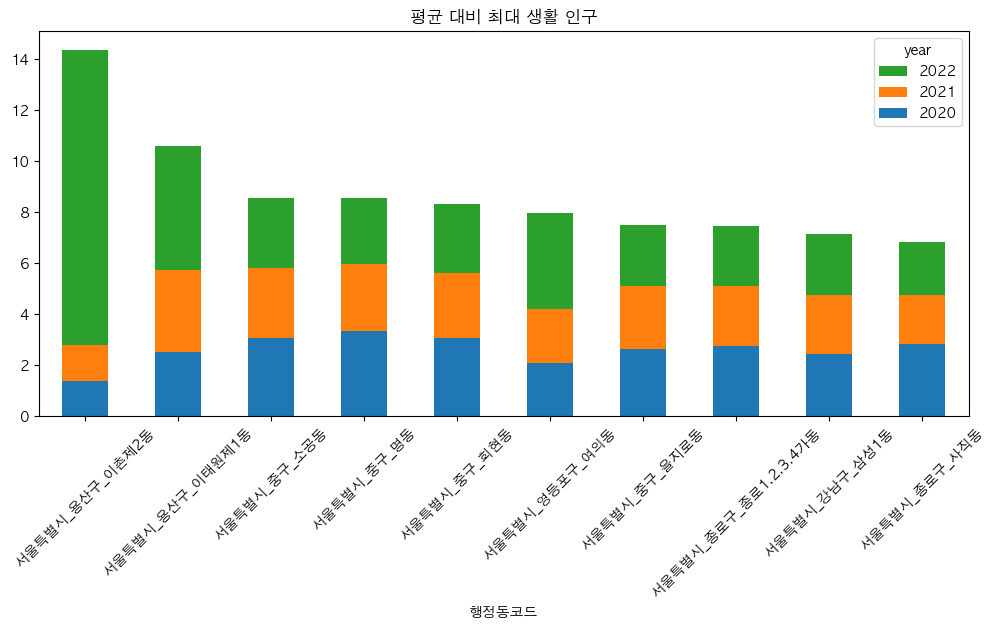

In [21]:
pivot_df.plot.bar(stacked=True, legend="reverse", figsize=(12, 5))

plt.xticks(rotation=45)
plt.title("평균 대비 최대 생활인구 Bar")

plt.show()